# install openCV

In [ ]:
!pip install opencv-python-headless

# Import Libraries

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files


# Process Image

In [30]:
def display_image(img,title="Image"):
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

def display_images(img1, img2, title1 = "Image 1", title2="Image2"):
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')

  plt.show()

### Load Image

Saving muka.jpg to muka (6).jpg


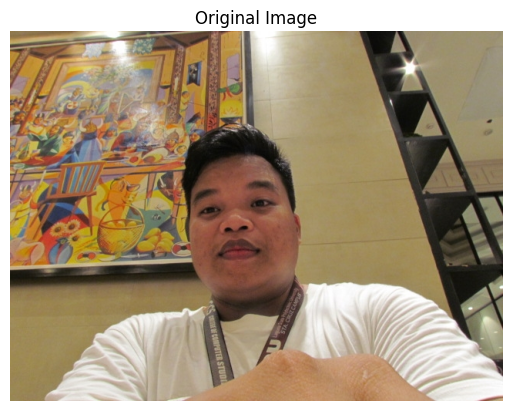

In [31]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)


display_image(image, "Original Image")

### Exercise 1: Scaling and Rotation





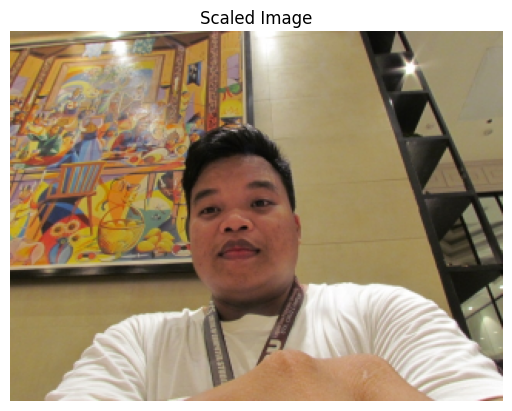

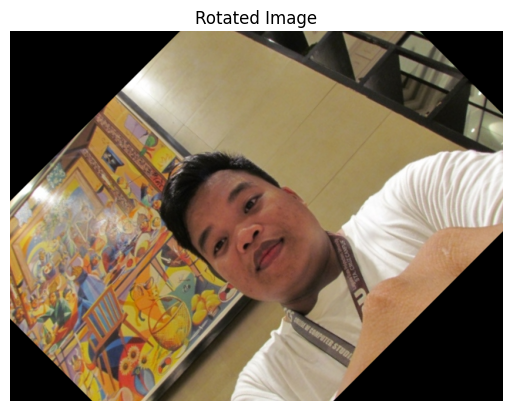

In [32]:
def scale_image(img, scale_factor):
  height, width = img.shape[:2]
  scale_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)), interpolation = cv2.INTER_LINEAR)
  return scale_img

def rotate_image(image, angle):
  height, width = image.shape[:2]
  center = (width//2,height//2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1)
  rotated_image = cv2.warpAffine(image, matrix,(width, height))
  return rotated_image

scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image")

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image")

### Exercise 2: Blurring  Techniques

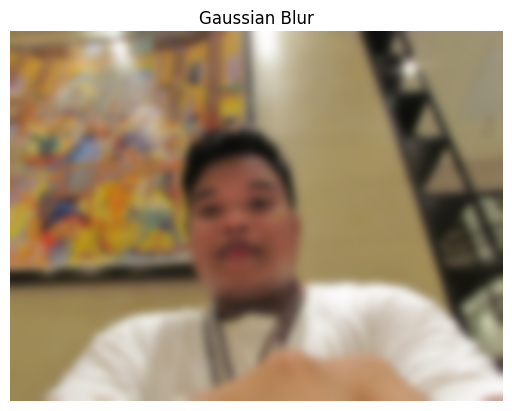

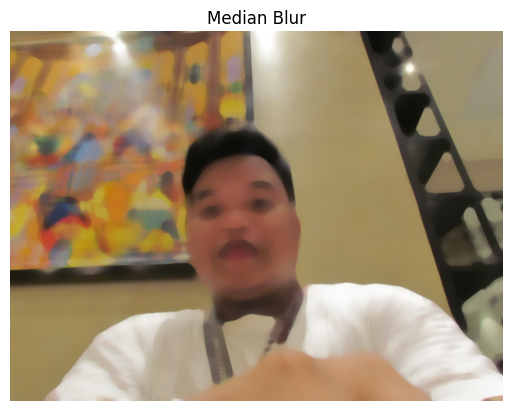

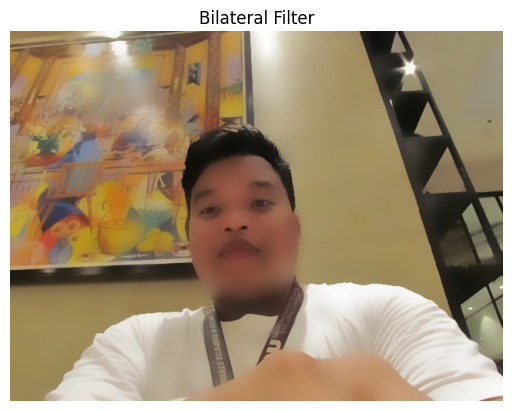

In [33]:
gaussian_blur = cv2.GaussianBlur(image, (35,35),0)
display_image(gaussian_blur, "Gaussian Blur")

median_blur = cv2.medianBlur(image,15)
display_image(median_blur, "Median Blur")

bilateral_filter = cv2.bilateralFilter(image,25, 85, 85)
display_image(bilateral_filter, "Bilateral Filter")

### Exercise 3: Edge Detection using Canny


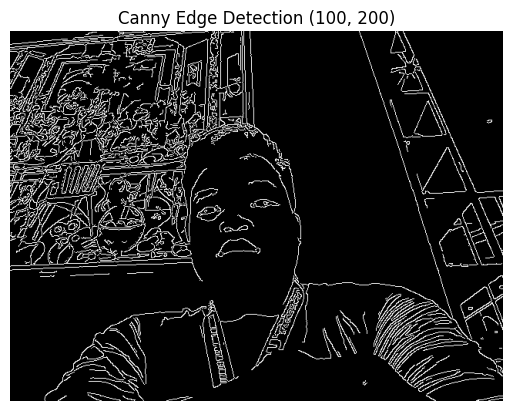

In [34]:
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

# Exercise 4: Basic Image Process (Interactive)

Enter actions (e.g., scale, rotate, gaussian_blur, median_blur, canny) separated by commas: canny


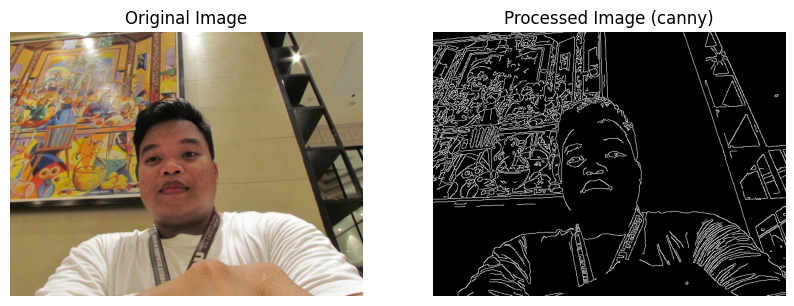

In [35]:
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    return cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, matrix, (width, height))

def process_image(img, actions):
    processed_img = img.copy()

    for action in actions:

        action = action.lower().strip()

        if action == 'scale':
            processed_img = scale_image(processed_img, 0.5)
        elif action == 'rotate':
            processed_img = rotate_image(processed_img, 45)
        elif action == 'gaussian_blur':
            processed_img = cv2.GaussianBlur(processed_img, (5, 5), 0)
        elif action == 'median_blur':
            processed_img = cv2.medianBlur(processed_img, 5)
        elif action == 'canny':
            processed_img = cv2.Canny(processed_img, 100, 200)

    return processed_img

def display_images(original, processed, original_title, processed_title):
    plt.figure(figsize=(10, 5))

    # Show Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(original_title)
    plt.axis('off')

    # Show Process Image
    plt.subplot(1, 2, 2)
    plt.title(processed_title)
    if processed.ndim == 2:
        plt.imshow(processed, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()
# Assuming `image` is already loaded
action_input = input("Enter actions (e.g., scale, rotate, gaussian_blur, median_blur, canny) separated by commas: ")
actions = action_input.split(',')

processed_image = process_image(image, actions)
display_images(image, processed_image, "Original Image", f"Processed Image ({', '.join(actions)})")


# Exercise 5: Comparison of Filtering Techniques

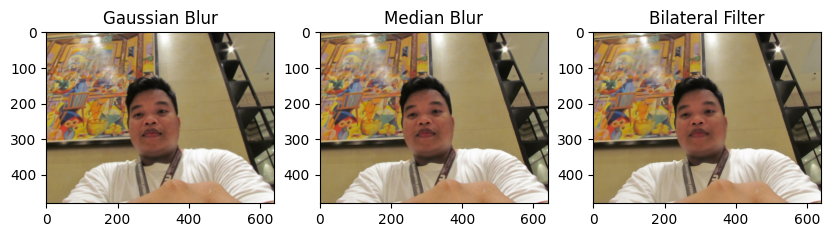

In [36]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""
# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

# Out-put

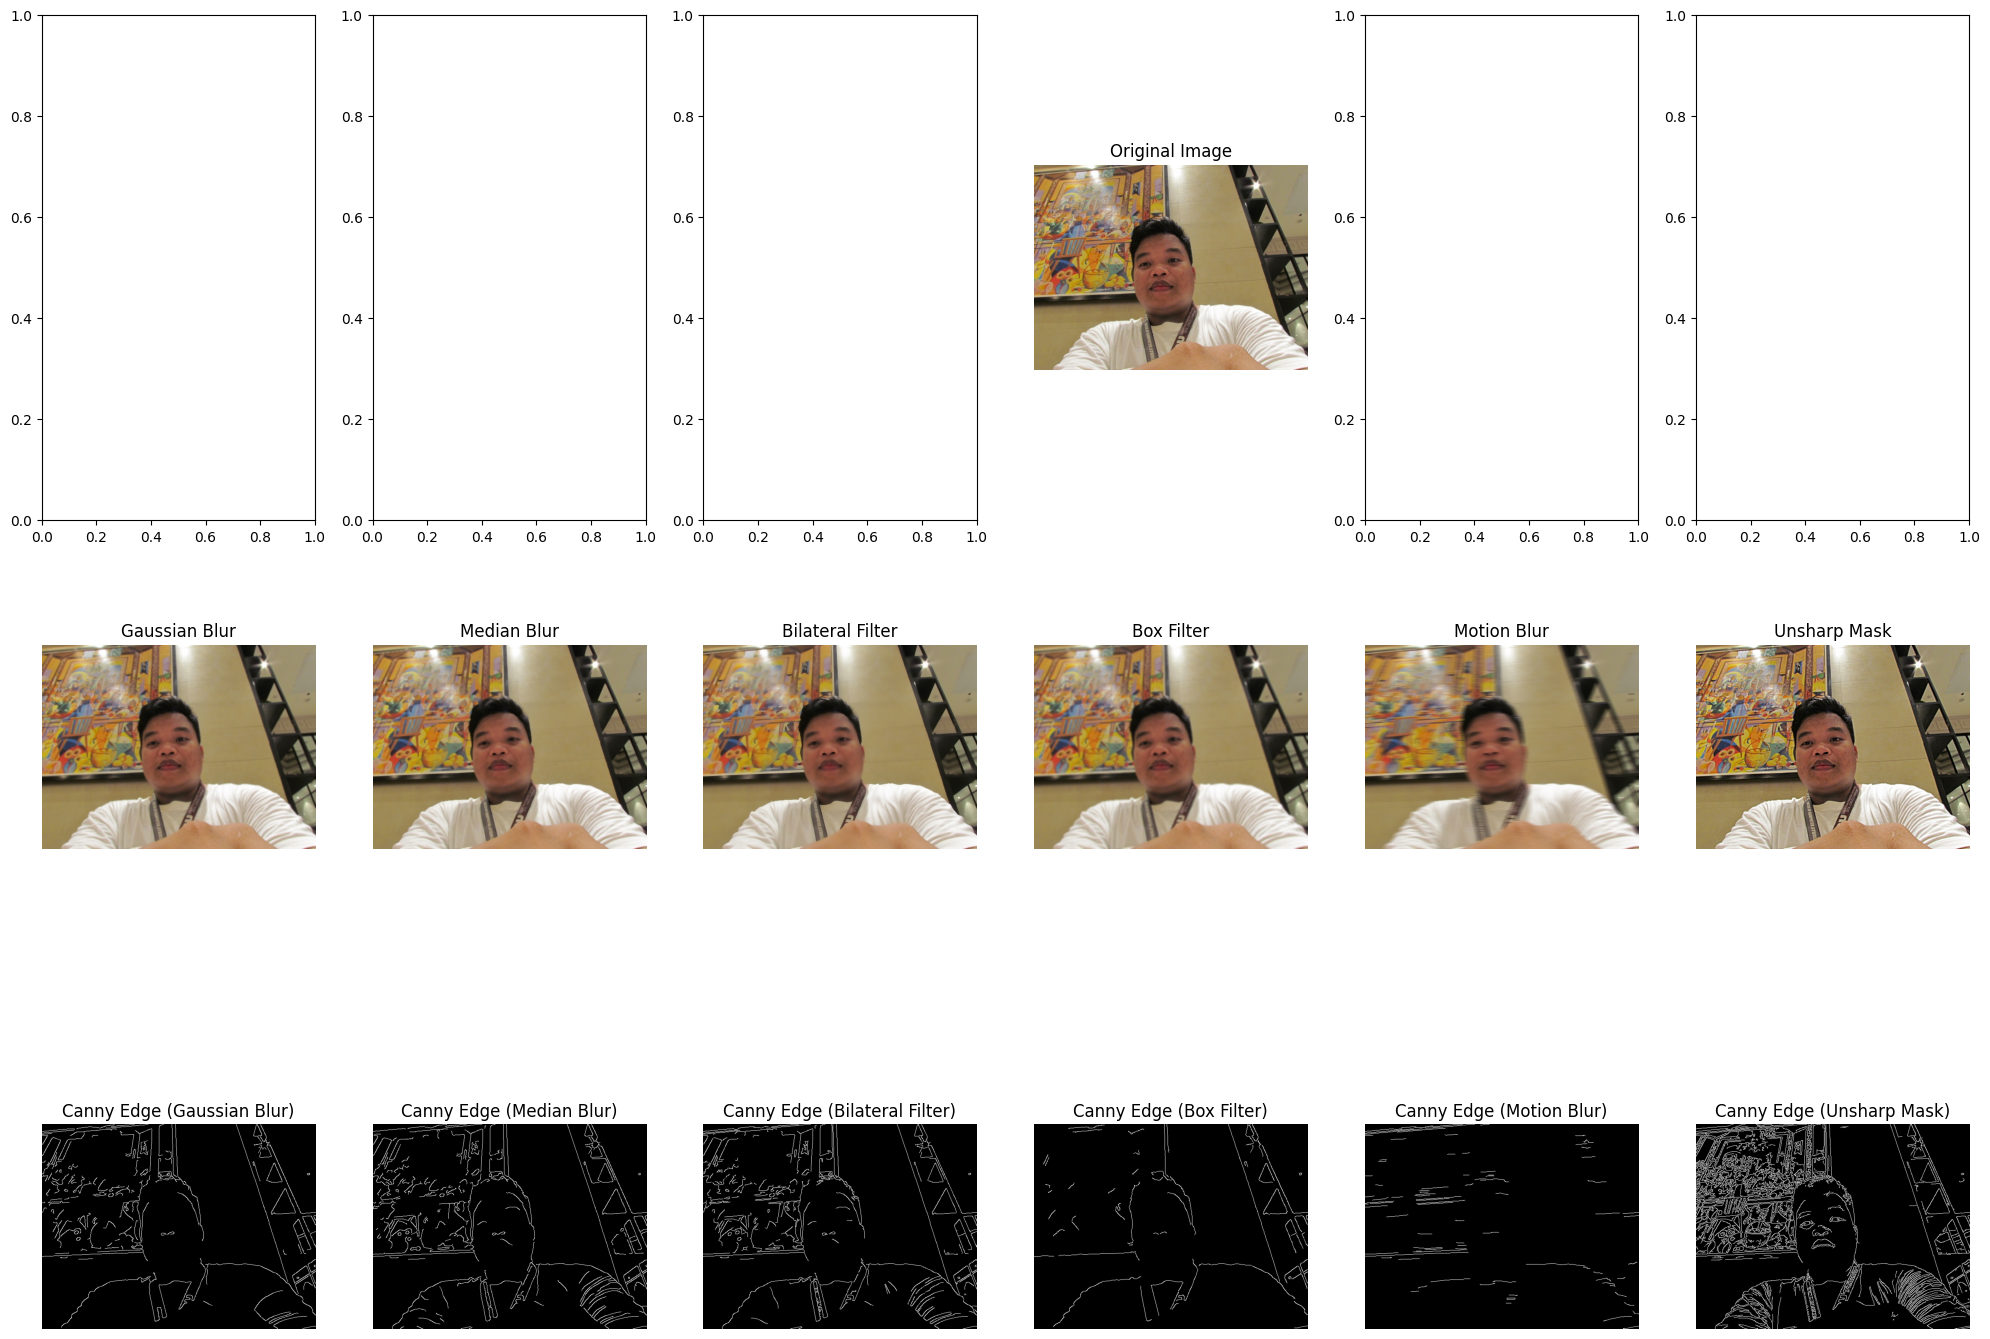

In [28]:
def apply_blurring_techniques(img):

    gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
    median_blur = cv2.medianBlur(img, 5)
    bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75)
    box_filter = cv2.blur(img, (5, 5))

    kernel_size = 15
    kernel_motion_blur = np.zeros((kernel_size, kernel_size))
    kernel_motion_blur[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
    kernel_motion_blur = kernel_motion_blur / kernel_size
    motion_blur = cv2.filter2D(img, -1, kernel_motion_blur)

    gaussian_for_unsharp = cv2.GaussianBlur(img, (9, 9), 10.0)
    unsharp_mask = cv2.addWeighted(img, 1.5, gaussian_for_unsharp, -0.5, 0)

    return gaussian_blur, median_blur, bilateral_filter, box_filter, motion_blur, unsharp_mask

def apply_edge_detection(img):


    sobel_edge = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    laplacian_edge = cv2.Laplacian(img, cv2.CV_64F)

    kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewitt_edge_x = cv2.filter2D(img, -1, kernel_prewitt_x)
    prewitt_edge_y = cv2.filter2D(img, -1, kernel_prewitt_y)
    prewitt_edge = prewitt_edge_x + prewitt_edge_y

    canny_edge = cv2.Canny(img, 100, 200)

    return sobel_edge, laplacian_edge, prewitt_edge, canny_edge

def plot_image_levels(original, blur_images, edge_images):

    num_blurs = len(blur_images)
    num_edges = len(edge_images[0])
    fig, axes = plt.subplots(3, max(num_blurs, num_edges), figsize=(20, 15))

    # Plot the original image at the top center
    axes[0, num_blurs//2].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, num_blurs//2].set_title("Original Image")
    axes[0, num_blurs//2].axis('off')

    blur_titles = ['Gaussian Blur', 'Median Blur', 'Bilateral Filter', 'Box Filter', 'Motion Blur', 'Unsharp Mask']
    edge_titles = ['Sobel Edge', 'Laplacian Edge', 'Prewitt Edge', 'Canny Edge']

    # Plot blurred images (second level)
    for i, (blur_img, title) in enumerate(zip(blur_images, blur_titles)):
        axes[1, i].imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))
        axes[1, i].set_title(title)
        axes[1, i].axis('off')

    for i in range(num_blurs):
          for j, (edge_img, title) in enumerate(zip(edge_images[i], edge_titles)):
              axes[2, i].imshow(edge_img, cmap='gray')
              # Set the title for each column with the edge detection technique name
              axes[2, i].set_title(f"{title} ({blur_titles[i]})")
              axes[2, i].axis('off')


    plt.tight_layout()
    plt.show()

# Apply blurring techniques
blurring_results = apply_blurring_techniques(image)

# Apply edge detection on blurred images
blurred_images = blurring_results
edge_images = [apply_edge_detection(cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)) for blur_img in blurred_images]

# Plot the images by level
plot_image_levels(image, blurred_images, edge_images)
